# Statistical Moments - Skewness and Kurtosis
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Sometimes mean and variance are not enough to describe a distribution. When we calculate variance, we square the deviations around the mean. In the case of large deviations, we do not know whether they are likely to be positive or negative. This is where the skewness and symmetry of a distribution come in. A distribution is <i>symmetric</i> if the parts on either side of the mean are mirror images of each other. For example, the normal distribution is symmetric. The normal distribution with mean $\mu$ and standard deviation $\sigma$ is defined as
$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
We can plot it to confirm that it is symmetric:

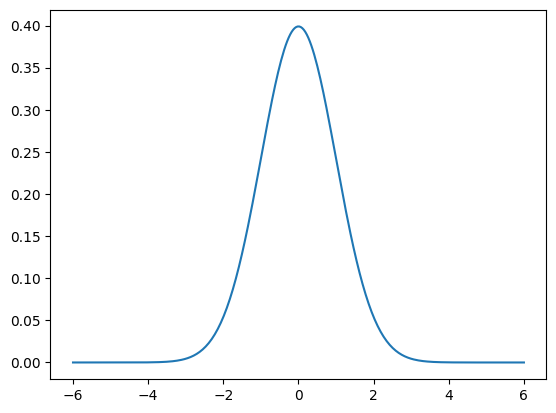

In [4]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal);

A distribution which is not symmetric is called <i>skewed</i>. For instance, a distribution can have many small positive and a few large negative values (negatively skewed) or vice versa (positively skewed), and still have a mean of 0. A symmetric distribution has skewness 0. Positively skewed unimodal (one mode) distributions have the property that mean > median > mode. Negatively skewed unimodal distributions are the reverse, with mean < median < mode. All three are equal for a symmetric unimodal distribution.

The explicit formula for skewness is:
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

Where $n$ is the number of observations, $\mu$ is the arithmetic mean, and $\sigma$ is the standard deviation. The sign of this quantity describes the direction of the skew as described above. We can plot a positively skewed and a negatively skewed distribution to see what they look like. For unimodal distributions, a negative skew typically indicates that the tail is fatter on the left, while a positive skew indicates that the tail is fatter on the right.

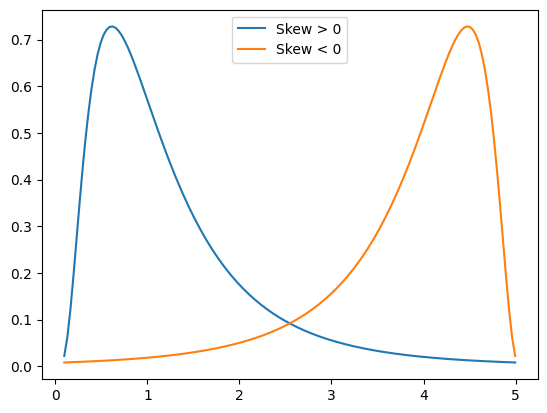

In [6]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)

# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew > 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend();

Although skew is less obvious when graphing discrete data sets, we can still compute it. For example, below are the skew, mean, and median for S&P 500 returns 2012-2014. Note that the skew is negative, and so the mean is less than the median.

In [7]:
start = '2012-01-01'
end = '2015-01-01'
pricing = get_pricing('SPY', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))

plt.hist(returns, 30);

NameError: name 'get_pricing' is not defined

# Kurtosis

Kurtosis attempts to measure the shape of the deviation from the mean. Generally, it describes how peaked a distribution is compared the the normal distribution, called mesokurtic. All normal distributions, regardless of mean and variance, have a kurtosis of 3. A leptokurtic distribution (kurtosis > 3) is highly peaked and has fat tails, while a platykurtic distribution (kurtosis < 3) is broad. Sometimes, however, kurtosis in excess of the normal distribution (kurtosis - 3) is used, and this is the default in `scipy`. A leptokurtic distribution has more frequent large jumps away from the mean than a normal distribution does while a platykurtic distribution has fewer.

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.593762875598


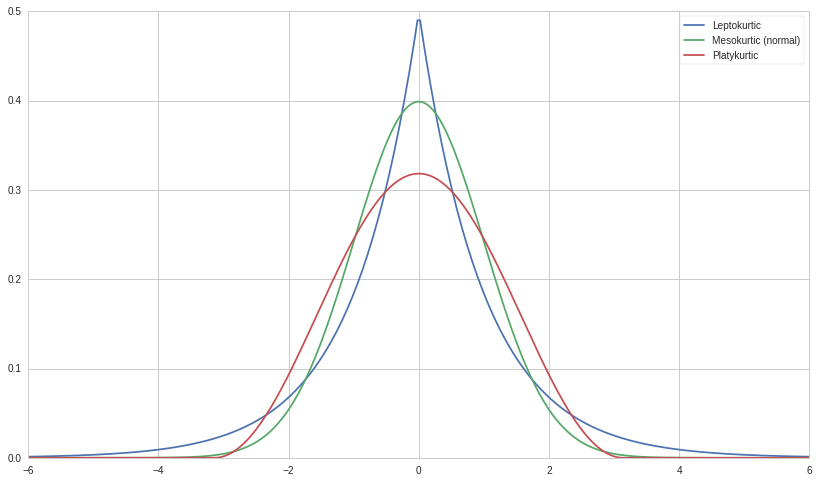

In [5]:
# Plot some example distributions
plt.plot(xs,stats.laplace.pdf(xs), label='Leptokurtic')
print 'Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k'))
plt.plot(xs, normal, label='Mesokurtic (normal)')
print 'Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k'))
plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print 'Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k'))
plt.legend();

The formula for kurtosis is
$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

while excess kurtosis is given by
$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

For a large number of samples, the excess kurtosis becomes approximately

$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

Since above we were considering perfect, continuous distributions, this was the form that kurtosis took. However, for a set of samples drawn for the normal distribution, we would use the first definition, and (excess) kurtosis would only be approximately 0.

We can use `scipy` to find the excess kurtosis of the S&P 500 returns from before.

In [6]:
print "Excess kurtosis of returns: ", stats.kurtosis(returns)

Excess kurtosis of returns:  1.21431979997


The histogram of the returns shows significant observations beyond 3 standard deviations away from the mean, multiple large spikes, so we shouldn't be surprised that the kurtosis is indicating a leptokurtic distribution.

# Other standardized moments

It's no coincidence that the variance, skewness, and kurtosis take similar forms. They are the first and most important standardized moments, of which the $k$th has the form
$$ \frac{E[(X - E[X])^k]}{\sigma^k} $$

The first standardized moment is always 0 $(E[X - E[X]] = E[X] - E[E[X]] = 0)$, so we only care about the second through fourth. All of the standardized moments are dimensionless numbers which describe the distribution, and in particular can be used to quantify how close to normal (having standardized moments $0, \sigma, 0, \sigma^2$) a distribution is.

# Normality Testing Using Jarque-Bera

The Jarque-Bera test is a common statistical test that compares whether sample data has skewness and kurtosis similar to a normal distribution. We can run it here on the S&P 500 returns to find the p-value for them coming from a normal distribution.

The Jarque Bera test's null hypothesis is that the data came from a normal distribution. Because of this it can err on the side of not catching a non-normal process if you have a low p-value. To be safe it can be good to increase your cutoff when using the test.

Remember to treat p-values as binary and not try to read into them or compare them. We'll use a cutoff of 0.05 for our p-value.

## Test Calibration

Remember that each test is written a little differently across different programming languages. You might not know whether it's the null or alternative hypothesis that the tested data comes from a normal distribution. It is recommended that you use the `?` notation plus online searching to find documentation on the test; plus it is often a good idea to calibrate a test by checking it on simulated data and making sure it gives the right answer. Let's do that now.

In [11]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)

0.054


Great, if properly calibrated we should expect to be wrong $5\%$ of the time at a 0.05 significance level, and this is pretty close. This means that the test is working as we expect.

In [8]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print 'The returns are likely normal.'
else:
    print 'The returns are likely not normal.'

The returns are likely not normal.


This tells us that the S&P 500 returns likely do not follow a normal distribution.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*